# Forecasts and Predictions Project


### Project description

In this project I am going to analyze digital user information collected by gym chain Model Fitness in order to develop customer interaction strategy based on analytical data.

<b> Main goals:</b>
1. Learn to predict the probability of churn (for the upcoming month) for each customer;
2. Draw up typical user portraits: select the most outstanding groups and describe their main features;
3. Analyze the factors that impact churn most;
4. Draw basic conclusions and develop recommendations on how to improve customer service.

### Table of Contents

* [Step 1. Data Preprocessing + EDA](#chapter1)
 
* [Step 2. Build a model to predict user churn.](#chapter2)

* [Step 3. Create user clusters](#chapter3)

* [Step 4. Come up with conclusions and basic recommendations on working with customers](#chapter4)

## Step 1. Data Preprocessing + EDA <a class="anchor" id="chapter1"></a>

In [2]:
#load libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
import re
import numpy as np
import pandas as pd
import seaborn as sns
import math as mth
import warnings; warnings.simplefilter('ignore')
import plotly.express as px


from functools import reduce
from math import factorial
from scipy import stats as st
from statistics import mean 
from IPython.display import display
from plotly import graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans


pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 10000)


### Look at the dataset: does it contain any missing features?

Load dataset and check data for missing values, dublicates and outliers.

In [3]:
try : gym = pd.read_csv('gym_churn_us.csv')
except: gym = pd.read_csv('/datasets/gym_churn_us.csv')

display(gym.head(5))
display(gym.info())
gym.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

None

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


1. We have a dataset that consists of 4000 entries (not bad, nor great). 
2. As I see there are no missing values here. 
3. Also there aren't any categorical values in the dataset, that's also good sign. 
4. There are some features that have high values of standart deviation (contract period, month to end of contract, lifetime). But there is one that has very high standart deviation - avg_additional_charges_total. Maybe I will need to clean it a little bit, because some outliers can affect my predictions.

### Look at the mean feature values in two groups: for those who left and for those who stayed.

In [4]:
gym.groupby('Churn').mean().transpose()

Churn,0,1
gender,0.510037,0.510839
Near_Location,0.873086,0.768143
Partner,0.534195,0.355325
Promo_friends,0.353522,0.183789
Phone,0.903709,0.902922
Contract_period,5.747193,1.728558
Group_visits,0.464103,0.268615
Age,29.976523,26.989632
Avg_additional_charges_total,158.445715,115.082899
Month_to_end_contract,5.283089,1.662582


We see here that most of users who have left have been from further locations, less of them were partners or came by friends promo. They usually had shorter contract period, didn't go to many group visits, have had less time left till the end of contract, have had much shorter lifetime (around 1 month only). They had smaller average visit frequency and even smaller average visit frequency in the current month (makes sence).

### Plot bar histograms and feature distributions for those who left (churn) and those who stayed.


gender


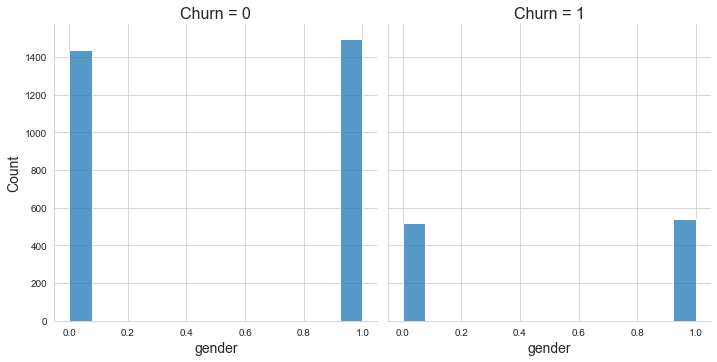

Near_Location


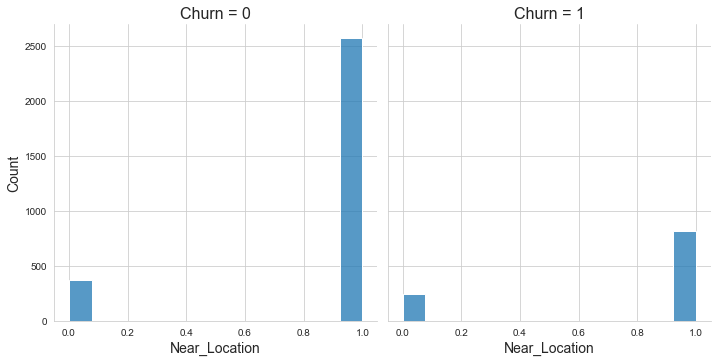

Partner


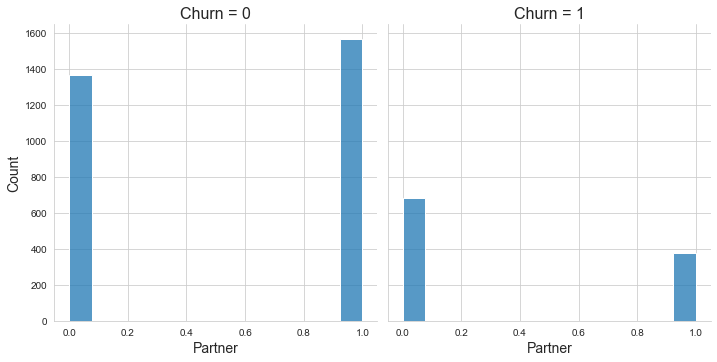

Promo_friends


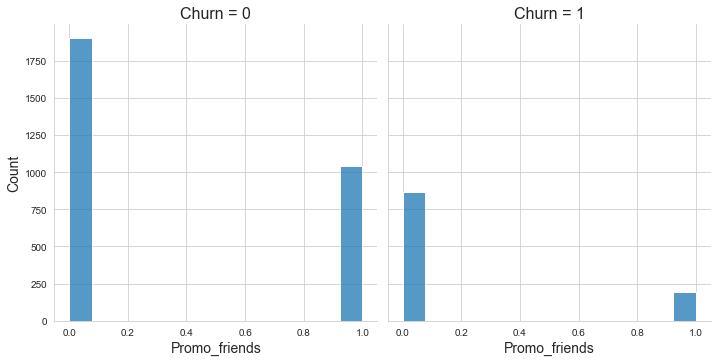

Phone


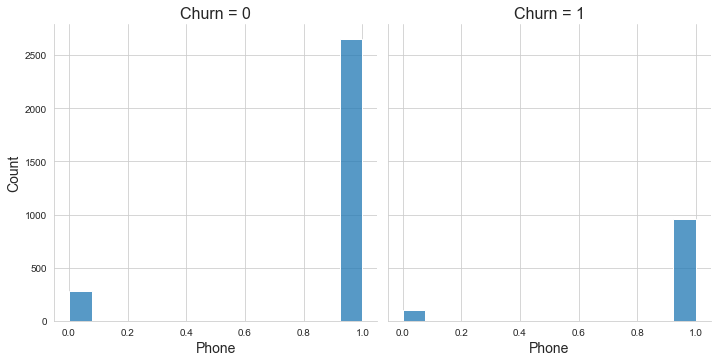

Contract_period


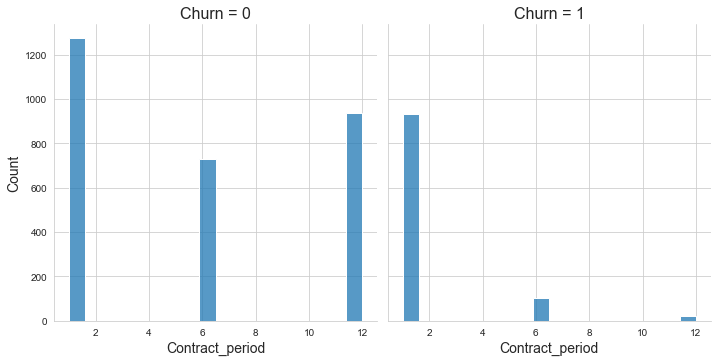

Group_visits


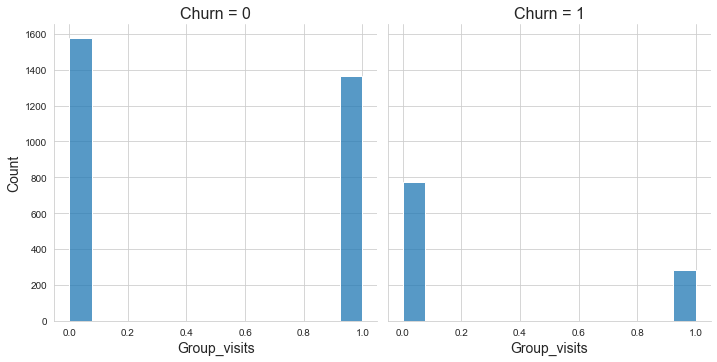

Age


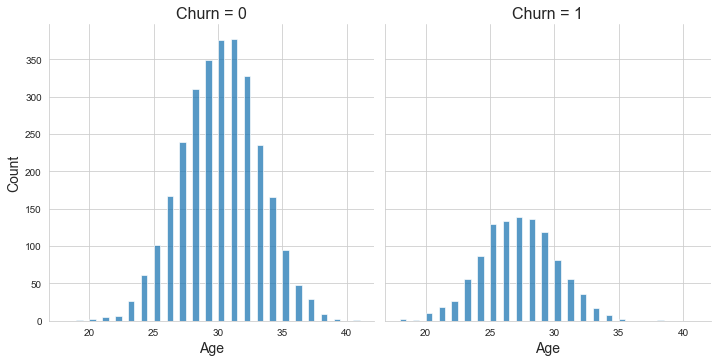

Avg_additional_charges_total


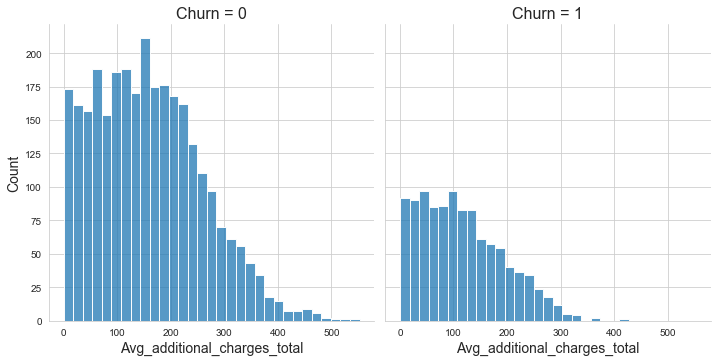

Month_to_end_contract


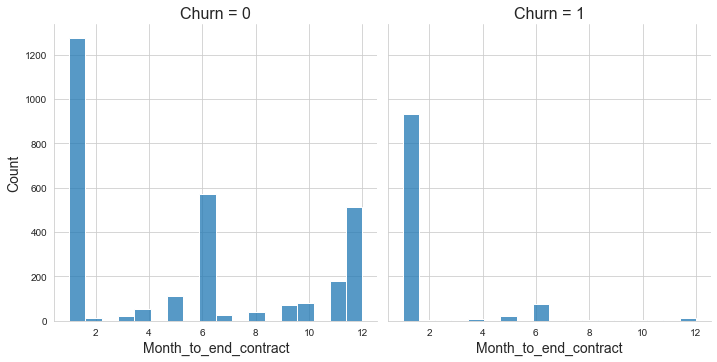

Lifetime


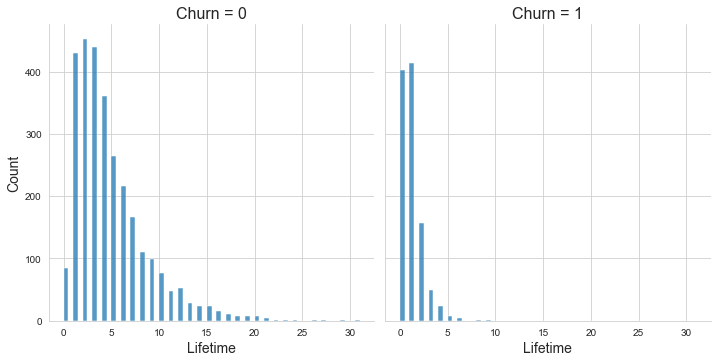

Avg_class_frequency_total


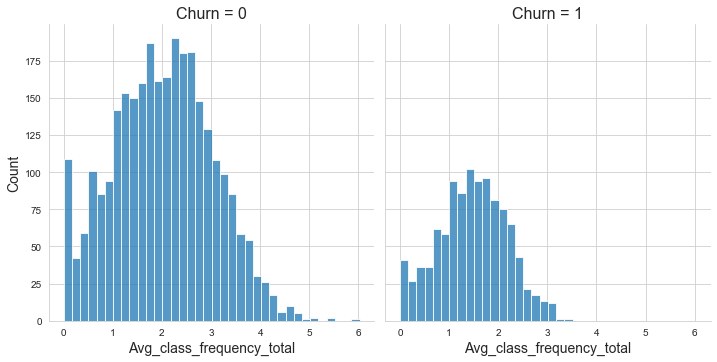

Avg_class_frequency_current_month


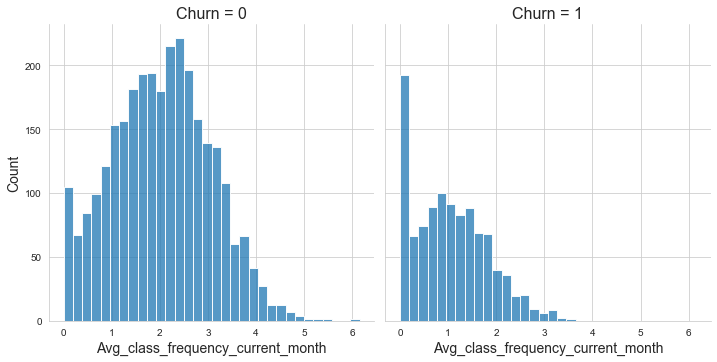

In [5]:
sns.set_style('whitegrid')
for col in gym.drop('Churn', axis=1).columns:
    print (col)
    g = sns.displot(gym, x=col, kde=False, col='Churn', bins='auto')
    g.set_titles(size=16)
    g.set_xlabels(size=14)
    g.set_ylabels(size=14)
    plt.show()

1. There is equal distribution between genders of those who left and who stayed;
2. Age distribution is roughly the same;
3. Those who stayed had shorter lifetime and smaller frequency in the last months.

### Build a correlation matrix and display it.


In [6]:
df = gym.corr()

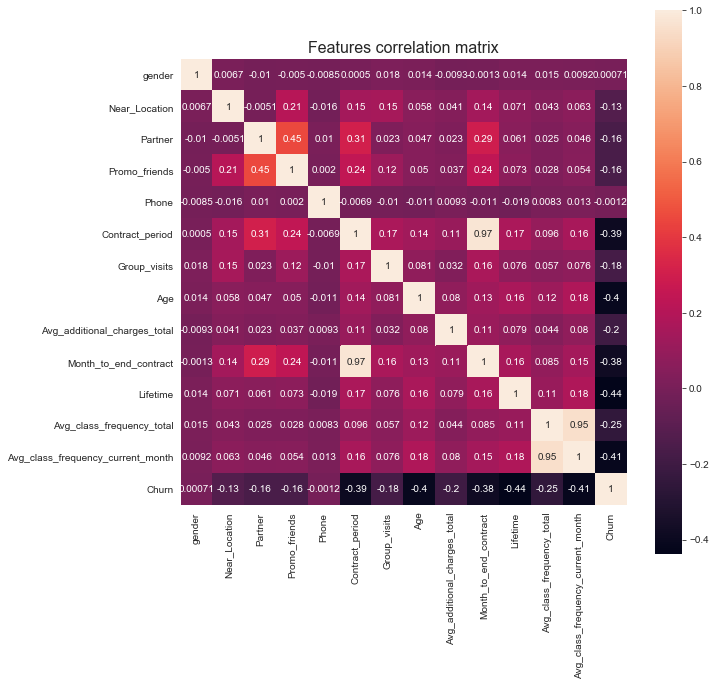

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Features correlation matrix',fontsize=16)
sns.heatmap(df, annot = True, square = True, ax=ax)

Here we can already see several things:
1. Columns 'Avg_class_frequency_current_month' and 'Avg_class_frequency_total' are strongly correlated, also columns 'Contract_period' and 'Months_to_end_contract' are strongly correlated too. We should pay attention to them while teaching the model;
2. There are features that are strongly correlated with churn. Like Avg_class_frequency_total, age, month_to_end_contract and others.

### Conclusion
1. EDA has revealed that we have a dataset that has good features, many of them are strongly correlated with target feature. Therefore we can apply machine-learning algorithms to solve required task.
2. Also we should pay attention th the fact that there are some features that are correlated with each other, so that should be taken into account while proceding with machine learning.

# Step 2. Build a model to predict user churn. <a class="anchor" id="chapter2"></a>


### Divide the data into train and validation sets using the train_test_split() function.


Firstly let's divide features and target variable.

In [8]:
X = gym.drop('Churn', axis=1)
y = gym['Churn']

Now let's divide into train and validation sets, test size will be 20%.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Now let's also standardize data. 

In [10]:
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)


X_test_st = scaler.transform(X_test)

### Train the model

I will train the model using to methods: logictic regression and random forest. I'll try multiple algoithmss and then I will check by the metrics which is better.

In [11]:
#models that I'm going to use
def print_all_metrics(y_true, y_pred, y_proba, title = 'Classification metrics'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))


In [13]:
# define the algorithm for the logistic regression model
lr_model = LogisticRegression(random_state=0)
# train the model
lr_model.fit(X_train_st, y_train)
# use the trained model to make predictions
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]
# print all metrics
print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Metrics for logistic regression:')



# define the algorithm for the new random forest model
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) # write your code here
# train the random forest model
rf_model.fit(X_train_st, y_train)
# use the trained model to make predictions
rf_predictions = rf_model.predict(X_test_st) # write your code here
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]# write your code here
# print all metrics
print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Metrics for random forest:')


Metrics for logistic regression:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83
	F1: 0.84
	ROC_AUC: 0.97
Metrics for random forest:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.81
	F1: 0.83
	ROC_AUC: 0.97


Looks like we've got some pretty good results both for logistic regression and for random forest. But F1, precision and recall are better for logistic regression. So in the future we can use this model to get preiction of churn for next month.

# Step 3. Create user clusters <a class="anchor" id="chapter3"></a>

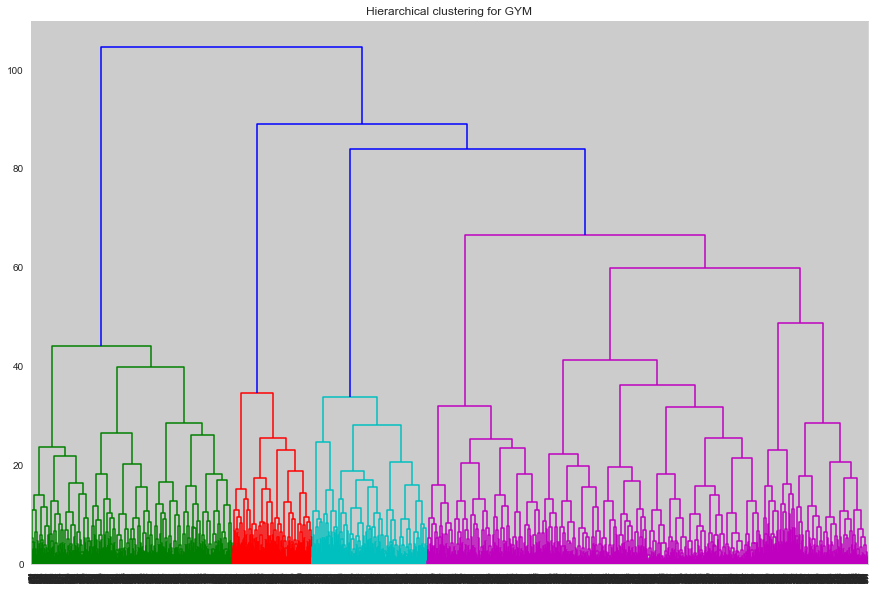

In [89]:
X_st = scaler.fit_transform(X)
linked = linkage(X_st, method = 'ward')

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for GYM')
plt.show()

Based on this dendrogram I can see that optimal choice will be either 4 or 5 clusters. I'll choose 5. 

### Clustering using K-means algorithm.

In [93]:
# define the function for rendering graphs of paired features for the clusters
def show_clusters_on_plot(df, x_name,y_name, cluster_name):
    plt.figure(figsize = (10,10))
    sns.scatterplot(df[x_name], df[y_name],
           hue = df[cluster_name], palette = 'Paired'
       )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()


# define the k_means model with 5 clusters
km = KMeans(n_clusters = 5)
# predict the clusters for observations (the algorithm assigns them a number from 0 to 4)
labels = km.fit_predict(X_st)

# store cluster labels in the field of our dataset
gym['cluster_km'] = labels

# print the statistics of the mean feature values per cluster
display(gym.groupby('cluster_km').mean())

# render the graph for the paired "juice bar" and "religion" features
# show_clusters_on_plot(travel, 'Average user feedback on juice bars', 'Average user feedback on religious institutions', 'cluster_km')

# # render the graph for the paired "juice bar" and "restaurants" features
# show_clusters_on_plot(travel, 'Average user feedback on juice bars', 'Average user feedback on restaurants', 'cluster_km')

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.500534,0.945571,0.741729,0.486660,0.899680,11.871932,0.552828,29.933831,164.763165,10.865528,4.695838,2.001331,1.992684,0.022412
1,0.495413,0.000000,0.466055,0.077064,0.915596,2.227523,0.214679,28.484404,133.862709,2.091743,2.788991,1.656393,1.465891,0.449541
2,0.488267,1.000000,0.243682,0.020758,0.902527,1.985560,0.320397,28.209386,131.191160,1.901625,2.398917,1.272734,1.030315,0.526173
3,0.484424,0.998442,0.822430,1.000000,0.900312,3.155763,0.454829,29.218069,141.203442,2.919003,3.705607,1.734352,1.627826,0.247664
4,0.585938,0.971354,0.260417,0.092448,0.903646,2.813802,0.477865,30.144531,162.010722,2.589844,5.132812,2.883403,2.884764,0.069010


I can certain logic in how these clusters were grouped. 
1. Clusters 1 and 2 have shortest contract period and lots of simillar parameters except for <i> Near_Location </i>, it is opposite for them. Also they show the highest churn rate;
2. Cluster 0 show users, who mostly live nearby, most of them have a year contract, have been with our gym for more than 4 months and have very low churn rate. They are our strong active users;
3. Cluster 3 show users that have on average 3-month contract, who have much time till the end of their contract and visit gym for around 2 times a week. They have churn rate of around 24 percent.
4. Cluster 4 shows very active users, who have highest lifetime, but who have shorter contracts. Many of them might have already renewed their contracts, they visit the gym often, 3 times a week on average, but they might not be ready for getting longer contract. Despite of that they have very low churn rate. They are active new users.

Let's take a look at churn/features ditribution to see if my assumptions were correct.

gender


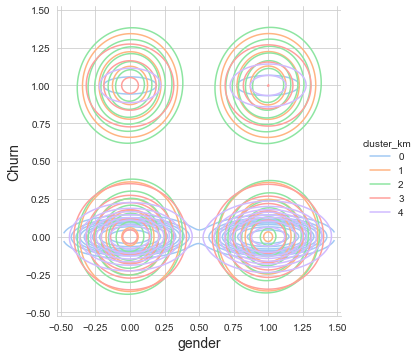

Near_Location


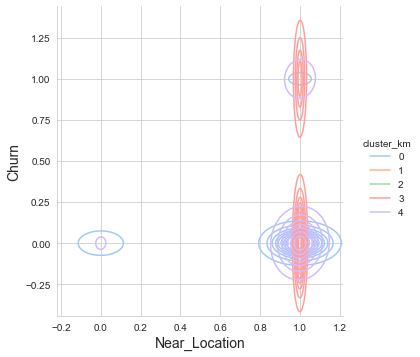

Partner


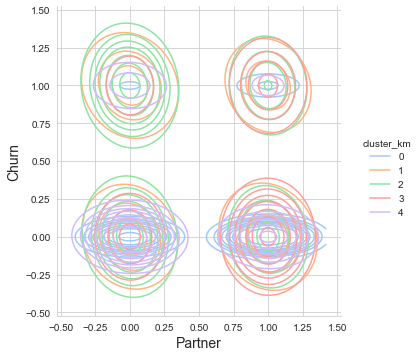

Promo_friends


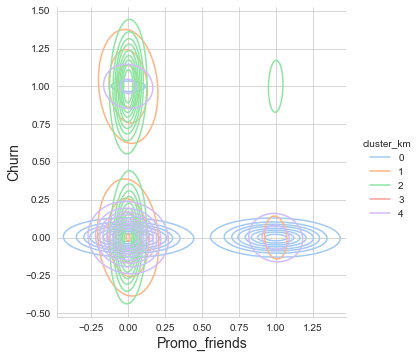

Phone


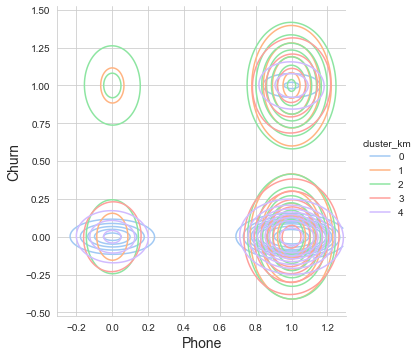

Contract_period


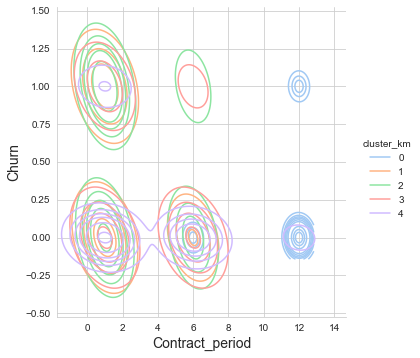

Group_visits


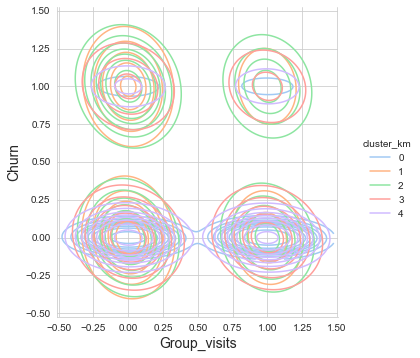

Age


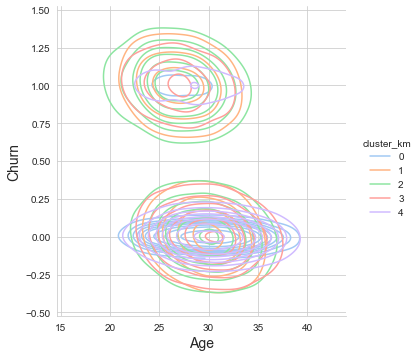

Avg_additional_charges_total


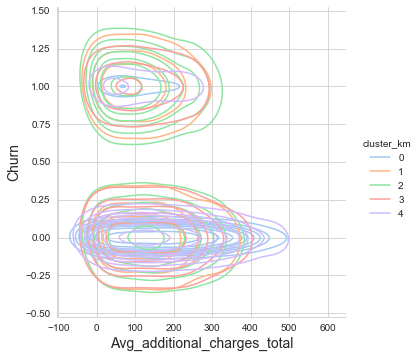

Month_to_end_contract


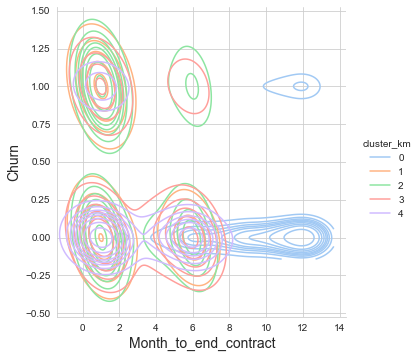

Lifetime


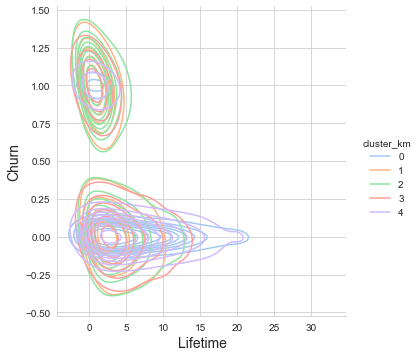

Avg_class_frequency_total


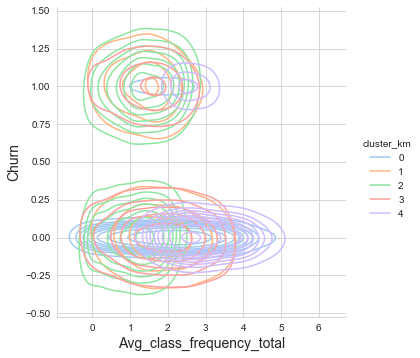

Avg_class_frequency_current_month


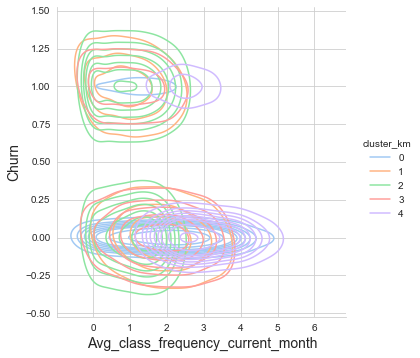

In [101]:
for col in gym.drop(['cluster_km','Churn'], axis=1).columns:
    print (col)
    g = sns.displot(gym, x=col, y="Churn", hue="cluster_km", kind="kde", palette="pastel")
    g.set_titles(size=16)
    g.set_xlabels(size=14)
    g.set_ylabels(size=14)
    plt.show()

### Plot distributions of features for the clusters.

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.

gender


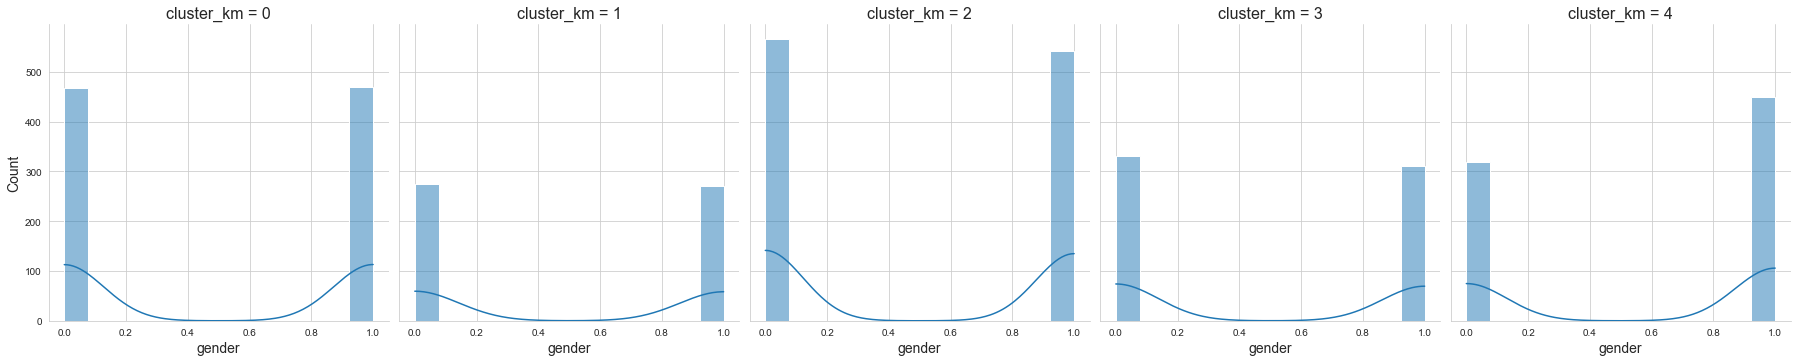

Near_Location


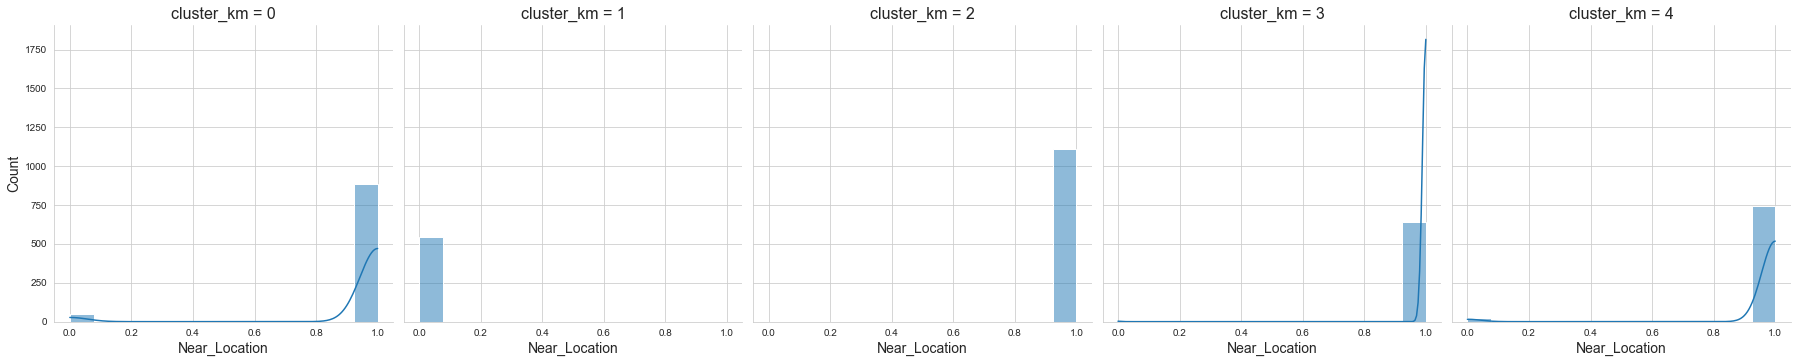

Partner


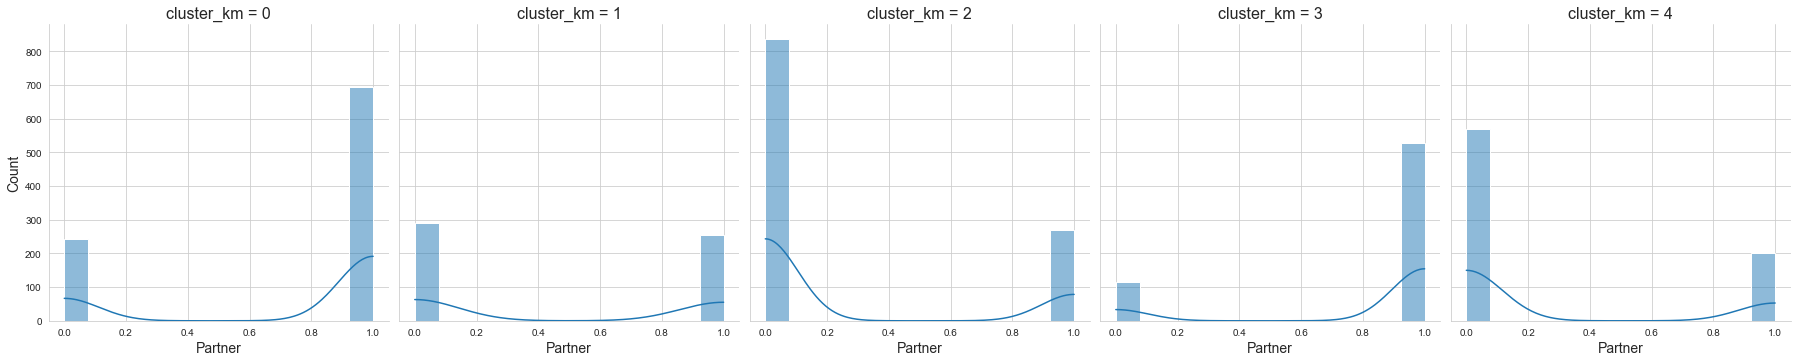

Promo_friends


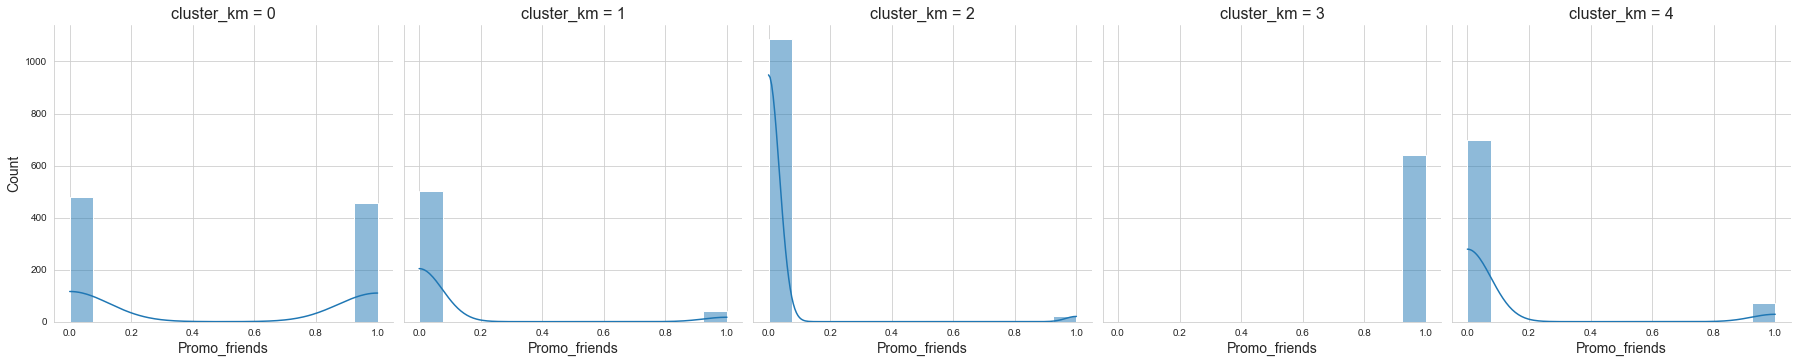

Phone


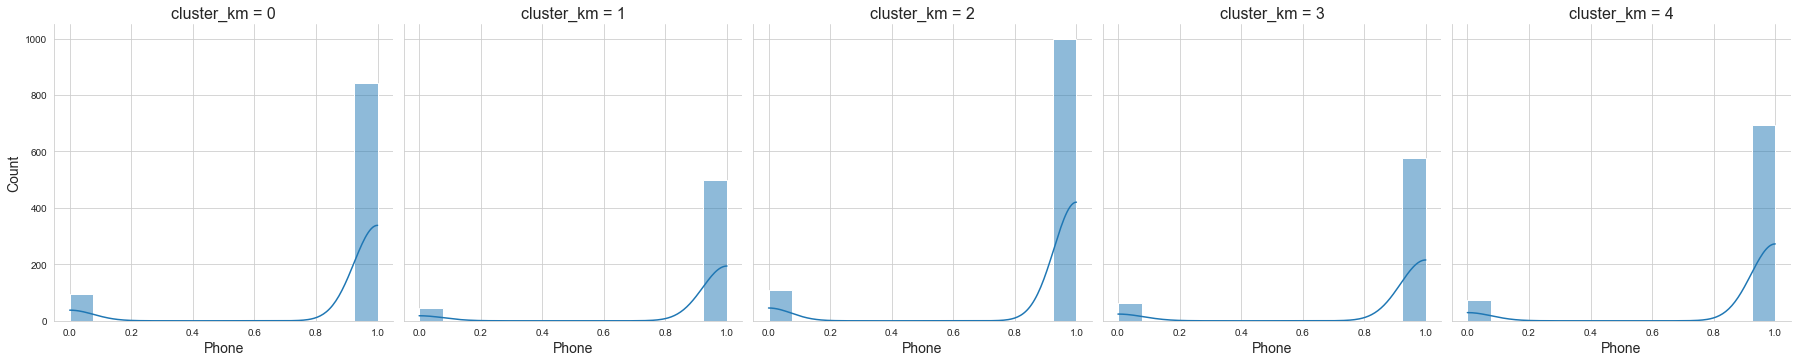

Contract_period


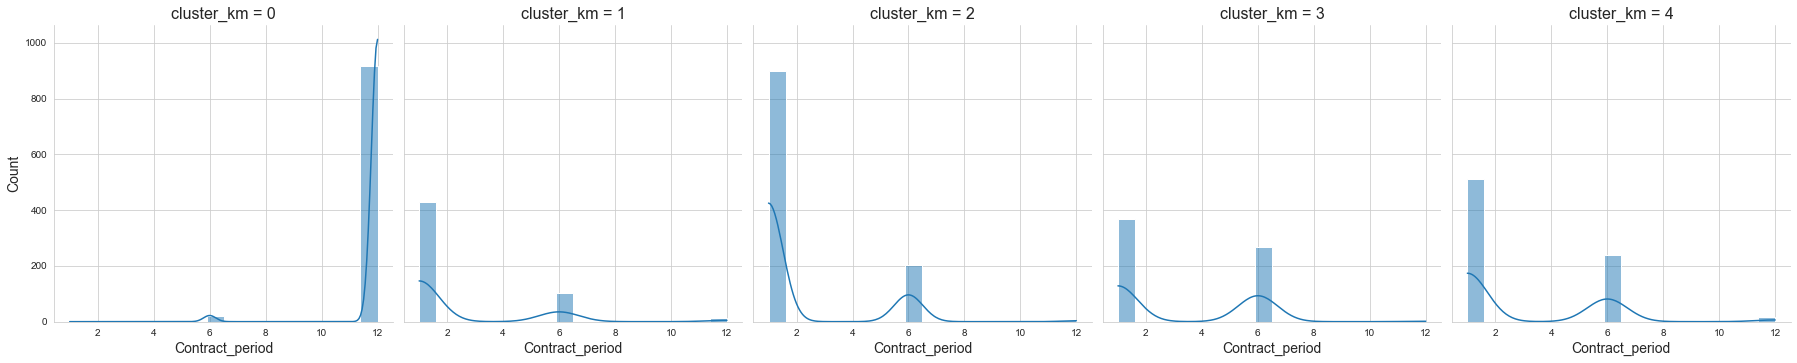

Group_visits


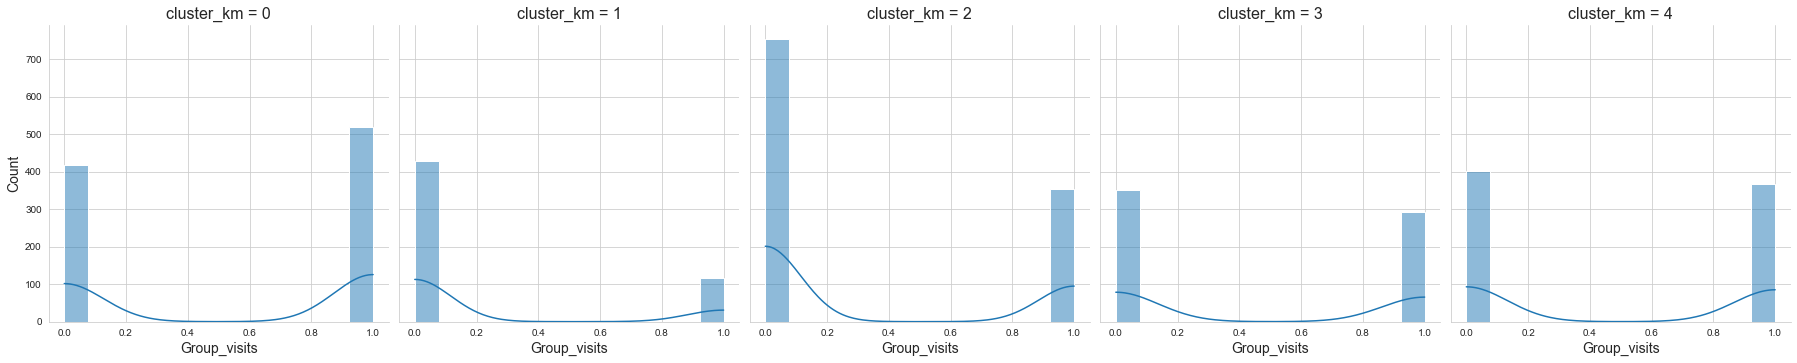

Age


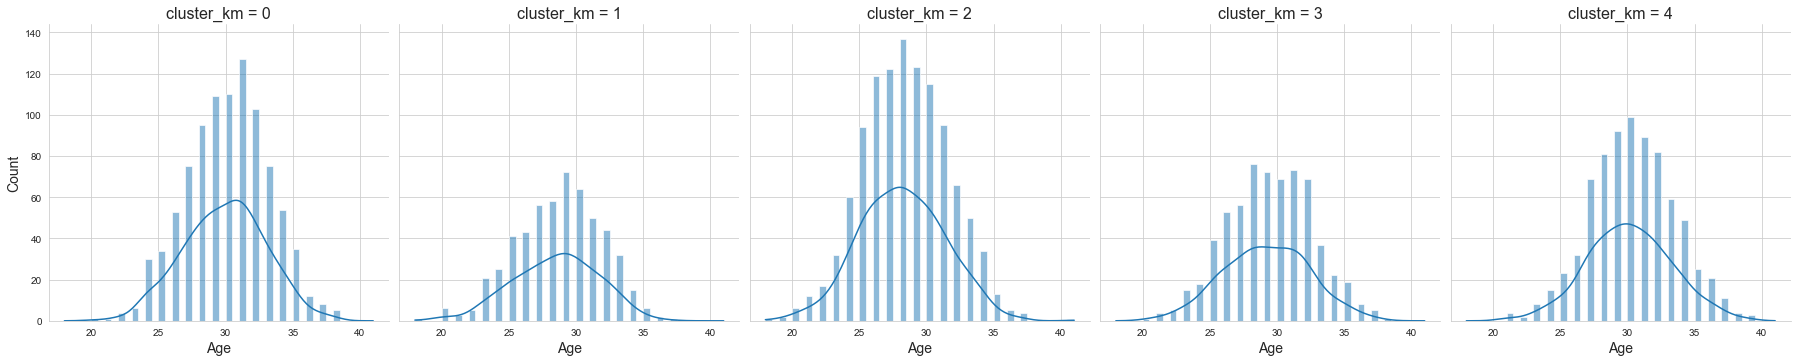

Avg_additional_charges_total


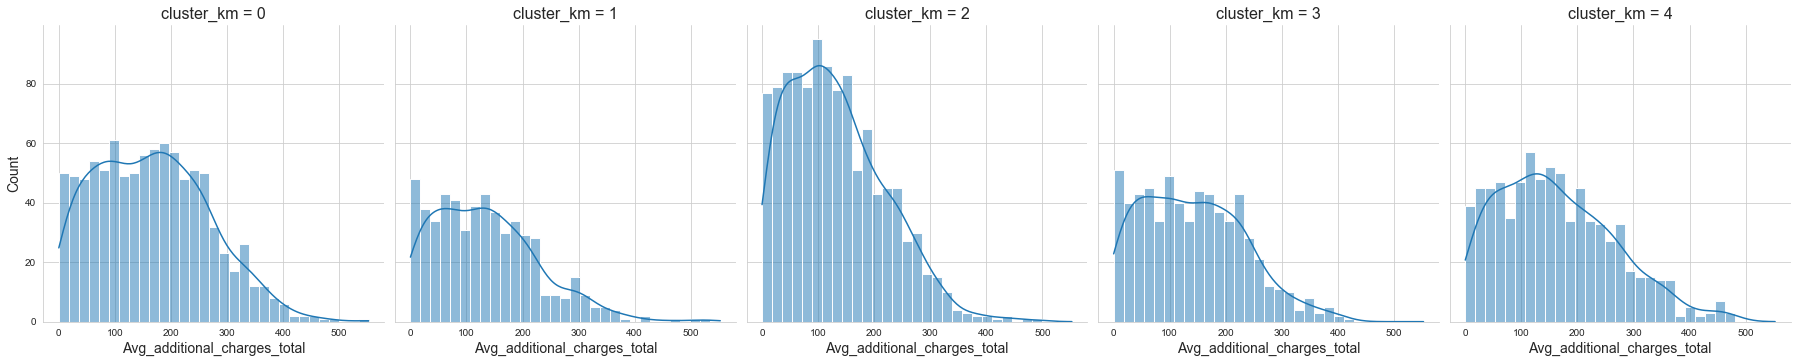

Month_to_end_contract


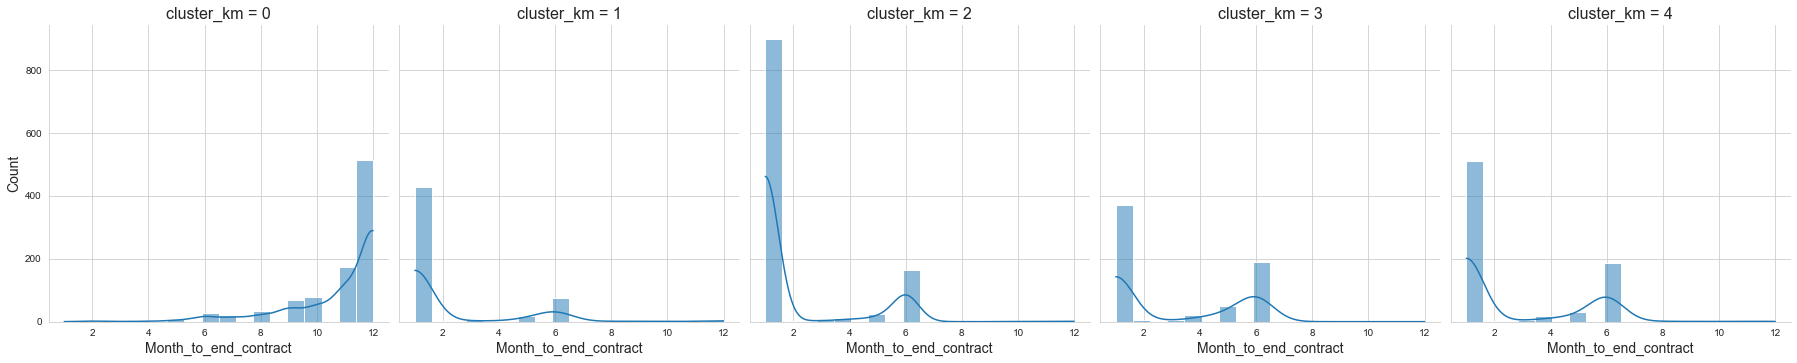

Lifetime


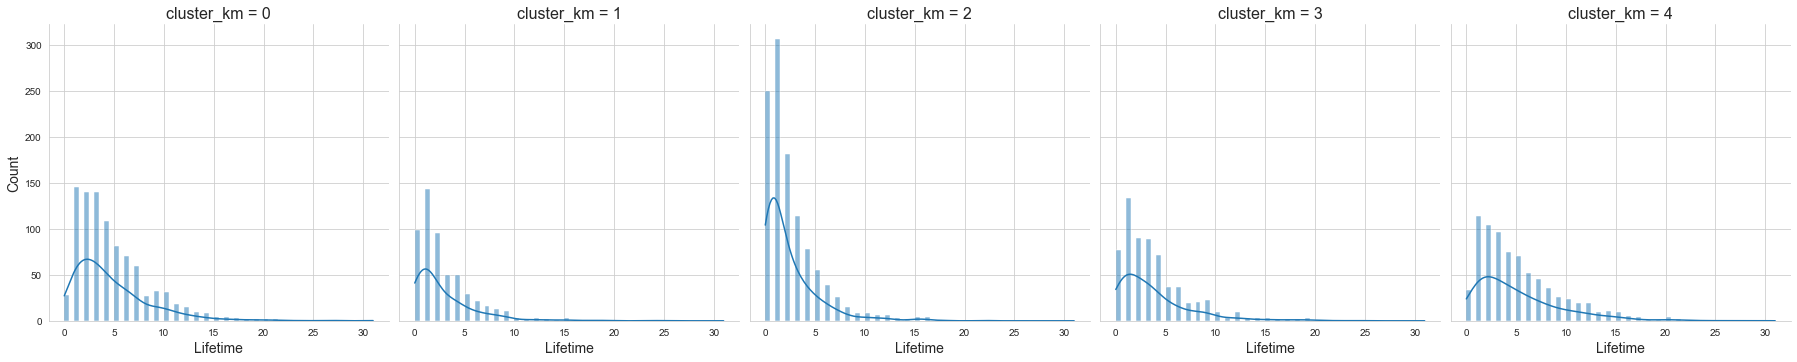

Avg_class_frequency_total


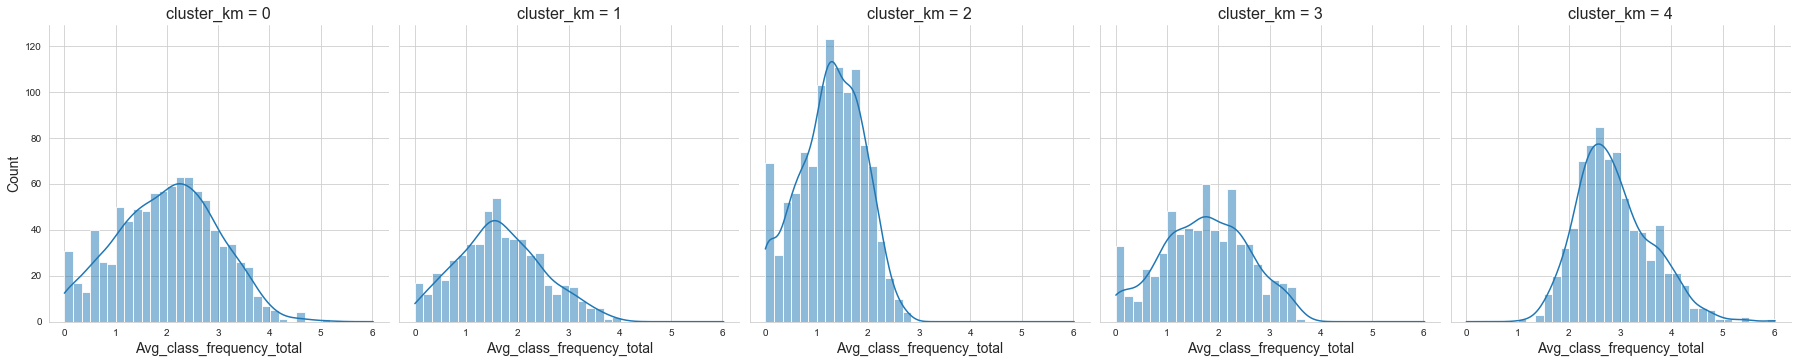

Avg_class_frequency_current_month


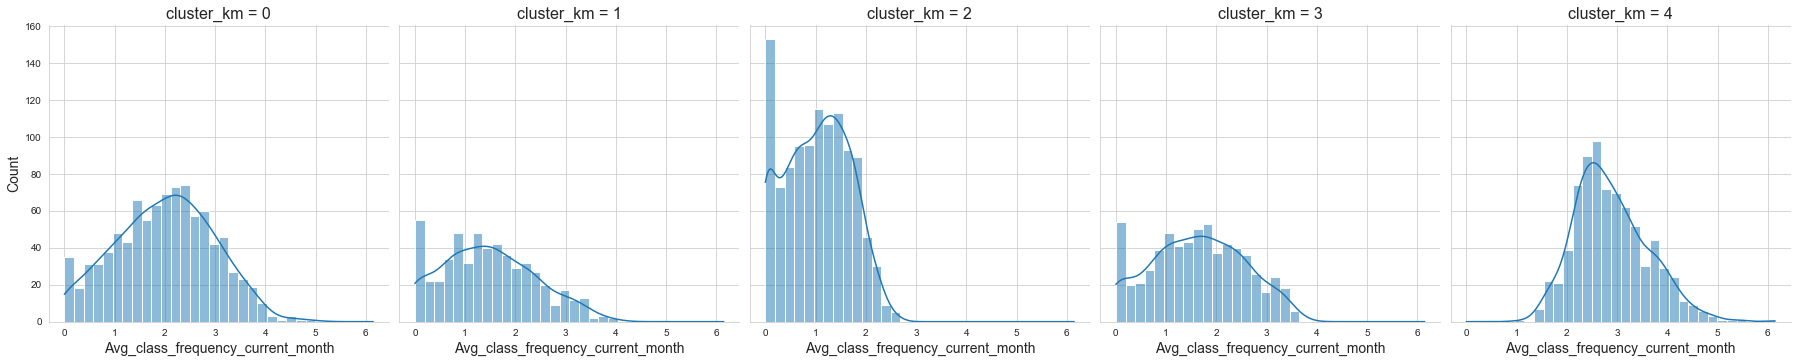

Churn


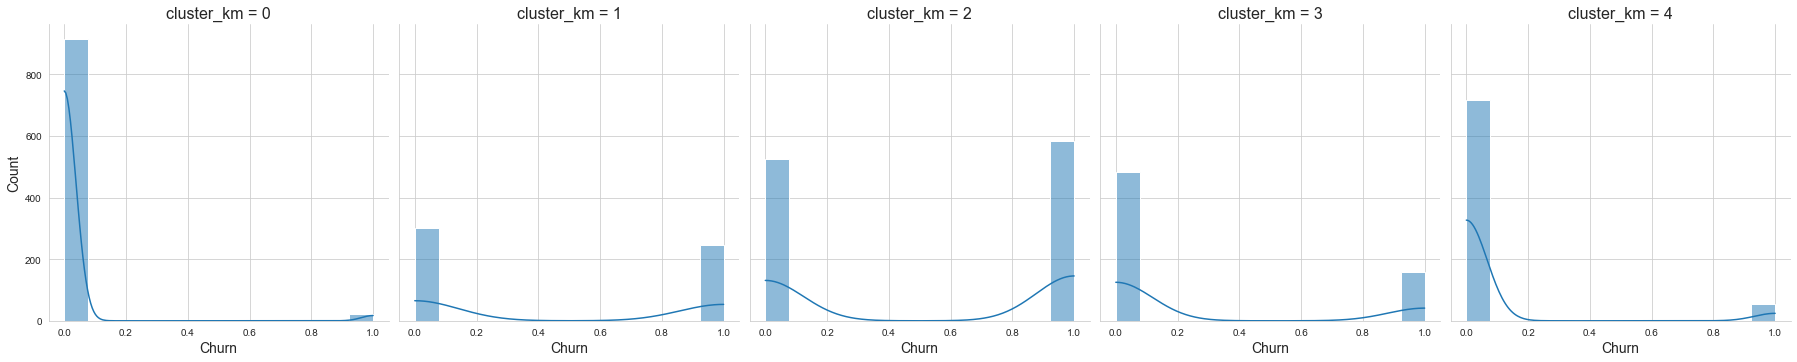

In [96]:
for col in gym.drop('cluster_km', axis=1).columns:
    print (col)
    try: g = sns.displot(gym, x=col, kde=True, col='cluster_km', bins='auto')
    except: g = sns.displot(gym, x=col, kde=False, col='cluster_km', bins='auto')
    g.set_titles(size=16)
    g.set_xlabels(size=14)
    g.set_ylabels(size=14)
    plt.show()

Here I can also see several other things. I see that cluster 2 also has the smallest contracts of all and haven't come from partners. That also affects churn rate for them. They seem to be that people that sign for a gym but don't go there afterwards. Many users from group 4 have come through promotion or from friends, these people tend to stay with the gym longer.

# Step 4. Come up with conclusions and basic recommendations on working with customers <a class="anchor" id="chapter4"></a>


There are several conclusions about importance of different metrics that can be made.
1. One of the most important ways to make a user stay with your gym longer is lenght of his contract. I recomend to advertize longer 6-month, year contracts to make more users stay with this gym;
2. Users who come from friends or company contracts tend to be more likely not to churn. I recommend to focus marketing on giving more company-offer discounts and also more advantages of inviting a friend;
3. Users who attend group sessions are also more likely to stay with your gym. This may be due to socialization and getting more involved in the process. So I advice to promote group sessions, maybe give new custumers some for free.